# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 


### Table of Contents


<a href="#Step-1.-Open-the-data-file-and-study-the-general-information.">Step 1. Open the data file and study the general information.</a>

<a href="#Step-2.-Data-preprocessing">Step 2. Data preprocessing</a>
* <a href="#Identify-and-study-missing-values">Identify and study missing values</a>
* <a href="#Convert-the-data-to-the-required-types">Convert the data to the required types</a>
* <a href="#Processing-duplicates">Processing duplicates</a>
          
<a href="#Step-3.-Make-calculations-and-add-them-to-the-table">Step 3. Make calculations and add them to the table</a>
* <a href="#Day-of-week,-month-and-year">Day of week, month and year</a>
* <a href="#Vehicles'-age-(in-years)">Vehicles' age (in years)</a>
* <a href="#Average-mileage-per-year">Average mileage per year</a>
          
<a href="#Step-4.-Carry-out-exploratory-data-analysis">Step 4. Carry out exploratory data analysis</a>
* <a href="#Study-parameters">Study parameters</a>
* <a href="#Determine-upper-limits-of-outliers">Determine upper limits of outliers</a>
* <a href="#Filter-and-remove-outliers">Filter and remove outliers</a>
* <a href="#Compare-histograms">Compare histograms</a>
* <a href="#Study-how-many-days-advertisements-were-displayed-('days_listed').">Study how many days advertisements were displayed ('days_listed)</a>
* <a href="#Analyze-the-number-of-ads-and-the-average-price-for-each-type-of-vehicle.">Analyze the number of ads and the average price for each type of vehicle</a>
* <a href="#What-factors-impact-the-price-most?">What factors impact the price most?</a>

<a href="#Step-5.-Overall-conclusion">Step 5. Overall conclusion</a>

<a href="#Project-completion-checklist">Project completion checklist</a>

### Step 1. Open the data file and study the general information.

In [1]:
# load libraries
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt 

# load the csv data file to python and save it to vehicles DataFrame
vehicles = pd.read_csv('/datasets/vehicles_us.csv')

# print the size of the dataset
display(vehicles.info())

# print the first ten rows of the dataset
display(vehicles.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


##### Conclusion

The dataset consists of 51525 rows and 13 columns in total, 8 columns with categorical variables [['model'](), ['condition'](), ['cylinders'](), ['fuel'](), ['transmission'](), ['type'](), ['paint_color'](), ['is_4wd']()] and 5 columns with quantitative variables [['price'](), ['model_year'](), ['odometer'](), ['date_posted'](), ['days_listed']()].

There are five columns with missing values [['model_year'](), ['cylinders'](), ['odometer'](), ['paint_color']() and ['is_4wd']()].

[<a href="#Table-of-Contents">Back to top</a>]

### Step 2. Data preprocessing

#### Identify and study missing values

In [2]:
# display the total number of missing values per column in the dataset
display("The total number of missing values per column:")
display(vehicles.isnull().sum())

display("The percentage of missing values per column:")
display(vehicles.isnull().sum() / len(vehicles))

# display the number of unique values in each column of the dataset including NaN
display("Counts of Unique values in each column including NaN")
display(vehicles.nunique(dropna=False))

'The total number of missing values per column:'

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

'The percentage of missing values per column:'

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

'Counts of Unique values in each column including NaN'

price            3443
model_year         69
model             100
condition           6
cylinders           8
fuel                5
odometer        17763
transmission        3
type               13
paint_color        13
is_4wd              2
date_posted       354
days_listed       227
dtype: int64

##### Conclusion

We investigate the dataframe to know the columns with missing values and also the number and percentage of the missing values in each column. A significant 50% values are missing in ['is_4wd']() column. We also determine the number of unique values in each column.

[<a href="#Table-of-Contents">Back to top</a>]

##### MODEL_YEAR

In [3]:
# categorize the dataframe using pivot table
display(vehicles.pivot_table(index=['model', 'transmission', 'type'], values='model_year').head())

# fill in missing values with mode values
vehicles['model_year'] = vehicles.groupby('model')['model_year'].apply(
    lambda x: x.fillna(x.mode().iloc[0]))

# display number of missing values in the column 
display(vehicles['model_year'].isnull().sum())

model_year
model    transmission type              
acura tl automatic    SUV    2007.000000
                      other  2006.000000
                      sedan  2007.606635
         manual       sedan  2005.750000
bmw x5   automatic    SUV    2009.220721

0

##### Conclusion

We categorized the dataframe to have an idea of how to fill our missing values. These missing values in our dataframe could be as a result of error of omission when inputing the data or maybe it was assumed that the vehicles of the same models have the same model year and does not need to be input repeatedly. So we decided to fill the missing values in this column with the most common model year grouped by the model because we assumed that vehicles of the same model are likely to have the same model year or with a range of model year.   

[<a href="#Table-of-Contents">Back to top</a>]

##### CYLINDERS

In [4]:
# fill in missing values with median values
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles.groupby(
    'model')['cylinders'].transform('median'))

# display number of missing values in the column
display(vehicles['cylinders'].isnull().sum())

0

##### Conclusion

It is possible that information of some vehicles' cylinder were not accessible during the data collection process which leads to us having missing values in the ['cylinders']() column. Since we are yet to determine whether the dataframe has outliers or not, we decided to fill the missing values with the median value of the cylinders for each model in the dataframe.

[<a href="#Table-of-Contents">Back to top</a>]

##### ODOMETER

In [5]:
# fill in missing values with median values
vehicles['odometer'] = vehicles['odometer'].fillna(
    vehicles.groupby(['model_year'])['odometer'].transform('median'))

# display number of missing values in the column
display(vehicles['odometer'].isnull().sum())

# display the row with missing value
display(vehicles[vehicles['odometer'].isnull()])

# display rows with model year 1929.0
display(vehicles[vehicles['model_year'] == 1929.0])

# display rows with model year less than 1929.0
display(vehicles[vehicles['model_year'] < 1929.0])

# drop the missing value in column 'odometer'
vehicles.dropna(subset=['odometer'], inplace = True)

# display number of missing values in the column
display(vehicles['odometer'].isnull().sum())

# get the most common year of gmc yukon model
gmc = vehicles[(vehicles['model'] == 'gmc yukon')]
mode_gmc = gmc['model_year'].value_counts().idxmax()
display(mode_gmc)

# get the most common year of cadillac escalade model
cadillac = vehicles[(vehicles['model'] == 'cadillac escalade')]
mode_cadillac = cadillac['model_year'].value_counts().idxmax()
display(mode_cadillac)

# replace the model year 1908.0 with 2007.0
vehicles.loc[vehicles['model_year'] == 1908.0, 'model_year'] = 2007.0

1

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,NaN,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,169328.0,automatic,SUV,white,NaN,2018-06-24,25


0

2007.0

2007.0

##### Conclusion

We can assume that the missing values in column ['odometer']() is as a result of faulty odometer which makes it difficult or unreadable when collecting data. 

We assumed that vehicles with the same model year will have slight difference in their odometer. So we used the median of ['odometer']() grouped by the vehicles' model year to update the missing values in column ['odometer'](). 

We discovered that there are still 1 missing value in the column, so we decided to inspect this row. To our surprise, the missing value is model [ford f-150]() and the model year is 1929. We continue our investigation to found out that this vehicle is the only vehicle with the model year 1929. We decided to deepened our investigation by looking through the dataframe if there are vehicles with model year closer to 1929 so we can use to update our missing odometer.

But then we dicovered that there are two different models of vehicles with model year of 1908, and both are automatic cars. No automatic cars has been launched during that time. So we decided to drop the row with missing odometer and update the two rows with model year 1908 with the most common year of each model.

[<a href="#Table-of-Contents">Back to top</a>]

##### PAINT_COLOR

In [6]:
# display the uniques values in column 'paint_color'
display(vehicles['paint_color'].unique())

# fill in missing values with 'default'
vehicles['paint_color'] = vehicles['paint_color'].fillna(value='custom')

# display number of missing values in the column
display(vehicles['paint_color'].isnull().sum())

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

0

##### Conclusion

The column ['paint_color']() has 9267 missing values. This could be as result of vehicles with mutiple colors, which will be impossible to input into the dataset.

Since it will be almost impossible for us to predict the color of a particular vehicle as there are 11 different colors in the column. So we decided to fill the missing values with 'custom', assuming the missing colors are customized with multiple color.

[<a href="#Table-of-Contents">Back to top</a>]

##### IS_4WD

In [7]:
# display the uniques values in column 'is_4wd'
display(vehicles['is_4wd'].unique())

# fill the missing values with 0
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(value=0)

# display number of missing values in the column
display(vehicles['is_4wd'].isnull().sum())

array([ 1., nan])

0

##### Conclusion

The data engineer might decided to just input the data for the vehicles with the 4 wheel drive feature, leaving the remaining vehicles without the feature blank. We filled our missing values with 0 based on this assumption since all the inputted values are 1s (meaning true that the vehicle is 4wd). 

[<a href="#Table-of-Contents">Back to top</a>]

#### Convert the data to the required types

##### MODEL_YEAR

In [8]:
# convert the data types of values in the column to datetime data type
vehicles['model_year'] = pd.to_datetime(vehicles['model_year'], format='%Y')

# extract the year from the date format
vehicles['model_year'] = pd.DatetimeIndex(vehicles['model_year']).year

# display the data type of the column 
display(vehicles['model_year'].dtype)

# display the first five rows of the dataframe
display(vehicles.head())

dtype('int64')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,custom,1.0,2018-06-23,19
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,160954.0,automatic,pickup,custom,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


##### Conclusion

We decided to change the data type of column ['model_year']() from floating to datetime. We then extract the year from the date format so we can have only the yaer in the column. The resulting data type is integer which makes sense since the values are whole numbers.

[<a href="#Table-of-Contents">Back to top</a>]

##### IS_4WD

In [9]:
# change the data type of the column to integer
vehicles['is_4wd'] = vehicles['is_4wd'].astype('bool')

# display the datatype of the column
display(vehicles['is_4wd'].dtype)

dtype('bool')

##### Conclusion

Since the values in this column are to determine if vehicles are 4wd or not, which is a yes or no option (1s and 0s), we changed the data type from floating point to boolean using the [.astype()]() method.

[<a href="#Table-of-Contents">Back to top</a>]

##### DATE_POSTED

In [10]:
# change the data type of the column to datetime 
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')

# display the data type of the column
display(vehicles['date_posted'].dtype)

dtype('<M8[ns]')

##### Conclusion

We changed the data type of ['date_posted']() column from string to datetime because it will be impossible to carry out calculations with the string data type and also the column stores the date each vehicle was placed on advertisement, which make sense to be in date format. 

[<a href="#Table-of-Contents">Back to top</a>]

#### Processing duplicates

In [11]:
# get the number of duplicates in the dataset
display("The number of duplicates in the dataset is:", vehicles.duplicated().sum())

'The number of duplicates in the dataset is:'

0

We discovered that there is no duplicate in our data.

[<a href="#Table-of-Contents">Back to top</a>]

### Step 3. Make calculations and add them to the table

#### Day of the week, month and year

In [12]:
# extract the days for the week from 'date_posted' and save it to new column 'weekdays'
vehicles['week_day'] = vehicles['date_posted'].dt.weekday

# calculating and adding a new column 'month' to the dataframe
vehicles['month_posted'] = vehicles['date_posted'].dt.month

# calculating and adding a new column 'year' to the dataframe 
vehicles['year_posted'] = vehicles['date_posted'].dt.year

# display the first five rows of the dataframe
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,custom,True,2018-06-23,19,5,6,2018
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,160954.0,automatic,pickup,custom,False,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019


##### Conclusion

We decided to create additional 3 different columns (['week_day'](), ['month_posted']() and ['year_posted']()) to our dataset. The ['week_day']() column is to store the days of week when vehicles are being placed on advertisement with 0 being monday and 6 being sunday, ['month_posted']() column to store the months when vehicles are being placed on advertisement, and ['year_posted']() column to store the year when each vehicles was placed on advertisement. These 3 new columns are extracted from the ['date_posted']() column so we will be able to carry out calculations easily.

[<a href="#Table-of-Contents">Back to top</a>]

#### Vehicles' age (in years)

In [13]:
# create a new column 'age_posted' storing the age of each vehicle
vehicles['age_posted'] = vehicles['year_posted'] - vehicles['model_year']
display(vehicles.head())

# display vehicles with age 0
display(vehicles[vehicles['age_posted'] == 0].head())

# replace age 0 with 1
vehicles.loc[vehicles['age_posted'] == 0, 'age_posted'] = 1

# show the number of vehicles with age 0
display(vehicles[vehicles['age_posted'] == 0].count().sum())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted,age_posted
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,custom,True,2018-06-23,19,5,6,2018,7
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8.0,gas,160954.0,automatic,pickup,custom,False,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted,age_posted
19,13990,2018,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,5,8,2018,0
71,23300,2018,nissan frontier crew cab sv,good,6.0,gas,27493.0,other,pickup,custom,True,2018-10-13,36,5,10,2018,0
78,23800,2019,nissan frontier crew cab sv,good,6.0,gas,10899.0,other,pickup,silver,True,2019-02-28,30,3,2,2019,0
99,39950,2018,chevrolet silverado,excellent,8.0,gas,18500.0,automatic,truck,custom,True,2018-08-05,16,6,8,2018,0
106,21500,2019,nissan frontier crew cab sv,good,6.0,gas,16168.0,other,pickup,white,False,2019-03-29,70,4,3,2019,0


0

##### Conclusion

We decided to calculate the age of each vehicle from the manufacture year to the day they were posted for advertisement by substracting the ['model_year']() from the ['year_posted']() and saved the results in new column ['age_posted']().

We noticed that there are some vehicles with age 0, this will be bad for further calculations. We assumed vehicles with age 0 were posted for advertisement the same year as their manufacture year, meaning they are at least some days old and in their first year. So we decided to replace the age 0 with 1.

[<a href="#Table-of-Contents">Back to top</a>]

#### Average mileage per year

In [14]:
# create a new column 'avg_mileage' storing the mileage of vehicles
vehicles['avg_mileage'] = vehicles['odometer'] / vehicles['age_posted']

# change the data type of column 'avg_mileage' to integer
vehicles['avg_mileage'] = vehicles['avg_mileage'].astype('int')

# display the first five rows of the dataset
display(vehicles.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted,age_posted,avg_mileage
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,custom,True,2018-06-23,19,5,6,2018,7,20714
1,25500,2013,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5,17741
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333
3,1500,2003,ford f-150,fair,8.0,gas,160954.0,automatic,pickup,custom,False,2019-03-22,9,4,3,2019,16,10059
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451


##### Conclusion

We calculated the average mileage for each vehicle by dividing the odometer of the vehicles by the age of veheicles as of the day they were posted for advertisement, and save the results in a new column ['avg_mileage'](). We decided to change the data type of the new column from floating point to integer. 

[<a href="#Table-of-Contents">Back to top</a>]

##### CONDITION

In [15]:
# create a function to replace string values to numeric scale
def condition_status(condition):
    """
    The function returns the condition status according to the condition value, using the following rules:
    — 5 for condition == 'new'
    — 4 for condition == 'like new'
    — 3 for condition == 'excellent'
    — 2 for condition == 'good'
    — 1 for condition == 'fair'
    — 0 for condition == 'salvage'
    """
    
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    return 0 

# apply the condition_status function to the 'condition' column
vehicles['condition'] = vehicles['condition'].apply(condition_status)

# display the first five rows of the dataset
display(vehicles.head())


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted,age_posted,avg_mileage
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,custom,True,2018-06-23,19,5,6,2018,7,20714
1,25500,2013,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5,17741
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333
3,1500,2003,ford f-150,1,8.0,gas,160954.0,automatic,pickup,custom,False,2019-03-22,9,4,3,2019,16,10059
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451


##### Conclusion

We created a function [condition_status]() with one parameter to replace the string values in column ['condition']() with numeric values. We then applied the function to the ['condition']() column by using the [.apply()]() method.

[<a href="#Table-of-Contents">Back to top</a>]

### Step 4. Carry out exploratory data analysis

#### Study parameters

The parameters to study are price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. 

First, we will start by displaying the statistics of each parameter using the [.describe()]() method.

We will then use histogram to plot each parameter against the number of vehicles, using the minimum and maximum values of each parameter to determine the range of the horizontal axes.

##### PRICE

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

Text(0, 0.5, 'Number of vehicles')

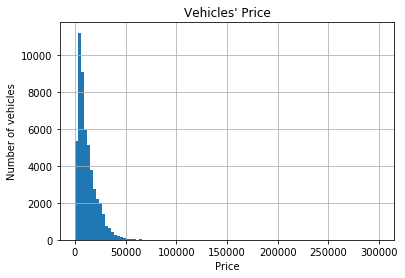

In [16]:
# display the statistics of the column
display(vehicles['price'].describe())

# plot histogram for column 'price'
vehicles.hist('price', bins=100, range=(0, 300000))
plt.title("Vehicles' Price")
plt.xlabel('Price')
plt.ylabel('Number of vehicles')


##### Conclusion

From the histogram, it is diffult for us to precise with the price with the most frequency. What we can conclude is that majority of the prices lie between 0 to 50000, and there are outliers somewhere above 50000. It is wierd to have some vehicles cost 0 as they are too much to be considered outliers. Is it that we have more vehicles in salvage condition in our dataframe?

[<a href="#Table-of-Contents">Back to top</a>]

##### AGE_POSTED

count    51524.000000
mean         8.473294
std          6.060487
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         82.000000
Name: age_posted, dtype: float64

Text(0, 0.5, 'Number of vehicles')

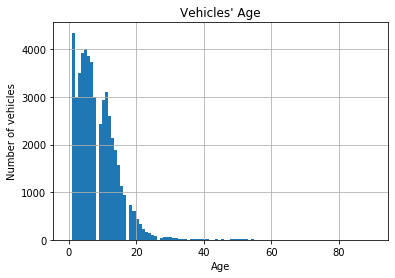

In [17]:
# display the statistics of the column
display(vehicles['age_posted'].describe())

# plot histogram for column 'age_posted'
vehicles.hist('age_posted', bins=100, range=(0, 90))
plt.title("Vehicles' Age")
plt.xlabel('Age')
plt.ylabel('Number of vehicles')

##### Conclusion

There is a peak of age between 0 and 20, and we will say it is difficult to determine the outliers as there are some spaces in between the bars.

[<a href="#Table-of-Contents">Back to top</a>]

##### AVG_MILEAGE

count     51524.000000
mean      18184.916039
std       13256.597239
min           0.000000
25%       10918.000000
50%       15361.500000
75%       21500.000000
max      373200.000000
Name: avg_mileage, dtype: float64

Text(0, 0.5, 'Number of vehicles')

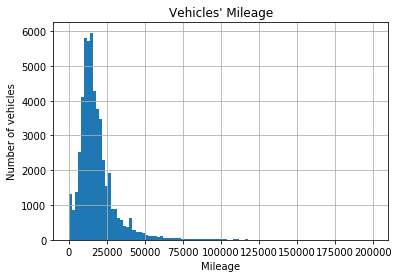

In [18]:
# display the statistics of the column
display(vehicles['avg_mileage'].describe())

# plot histogram for column 'avg_mileage'
vehicles.hist('avg_mileage', bins=100, range=(0, 200000))
plt.title("Vehicles' Mileage")
plt.xlabel('Mileage')
plt.ylabel('Number of vehicles')

##### Conclusion

Majority of the vehicles have average mileage between 0 and 25000, and we can conclude that the starting point of the outliers is between 100000 and 125000. 

[<a href="#Table-of-Contents">Back to top</a>]

##### CYLINDERS

count    51524.000000
mean         6.121031
std          1.657452
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Text(0, 0.5, 'Number of vehicles')

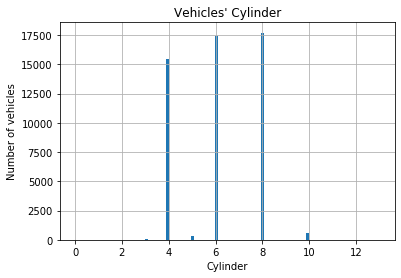

In [19]:
# display the statistics of the column
display(vehicles['cylinders'].describe())

# plot histogram for column 'cylinders'
vehicles.hist('cylinders', bins=100, range=(0, 13))
plt.title("Vehicles' Cylinder")
plt.xlabel('Cylinder')
plt.ylabel('Number of vehicles')

##### Conclusion

Vehicles with 4, 6, and 8 cylinders are the most common with over 15000 vehicles under each. There are barely other categories of the cylinders in our dataset.   

[<a href="#Table-of-Contents">Back to top</a>]

##### CONDITION

count    51524.000000
mean         2.637548
std          0.712449
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Text(0, 0.5, 'Number of vehicles')

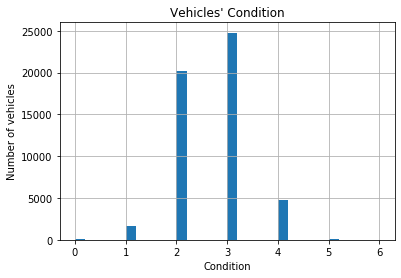

In [20]:
# display the statistics of the column
display(vehicles['condition'].describe())

# plot histogram for column 'condition'
vehicles.hist('condition', bins=30, range=(0, 6))
plt.title("Vehicles' Condition")
plt.xlabel('Condition')
plt.ylabel('Number of vehicles')

##### Conclusion

Most of the vehicles are in excellent and good condition with more than half of the whole vehicles falling in this category. We barely have new vehicles in our dataframe.

[<a href="#Table-of-Contents">Back to top</a>]

#### Determine upper limits of outliers

We decided to determine the upper limits of outliers for just three parameters (['price'](), ['age_posted'](), and ['avg_mileage']()) out of the five because they are the quantitative variables.

We will first calculate both the first quartile (Q1) and third quartile (Q3) for each parameters by using the [.quantile()]() method, and then calculate the interquartile range by substracting Q3 from Q1.

The next step is to determine the range of the axes, draw a boxplot for each parameters using the [.boxplot()]() method, and indicate where the upper limit of outliers begin with a red line.

##### PRICE

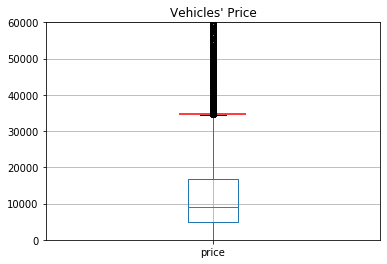

In [21]:
# calculate the quartiles for column 'price'
Q1_price = vehicles['price'].quantile(0.25)
Q3_price = vehicles['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# specify the range of y axis and title of the boxplot 
plt.ylim(-10, 60000)
plt.title("Vehicles' Price")

# plot the boxplot
vehicles.boxplot('price')
plt.hlines(y=Q3_price+1.5*IQR_price, xmin=0.9, xmax=1.1, color='red')
plt.show()

##### Conclusion

The upper whisker ends where the price is at 35000, which is 1.5 IQR above the third quartile. Everything above it can be considered an outlier.

[<a href="#Table-of-Contents">Back to top</a>]

##### AGE_POSTED

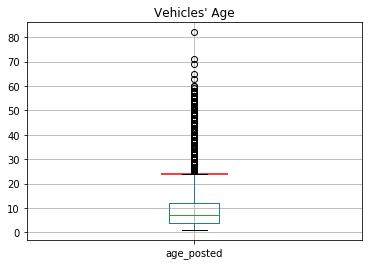

In [22]:
# calculate the quartiles for column 'age_posted'
Q1_age_posted = vehicles['age_posted'].quantile(0.25)
Q3_age_posted = vehicles['age_posted'].quantile(0.75)
IQR_age_posted = Q3_age_posted - Q1_age_posted

# title of the chart 
plt.title("Vehicles' Age")

# plot the boxplot
vehicles.boxplot('age_posted')
plt.hlines(y=Q3_age_posted+1.5*IQR_age_posted, xmin=0.9, xmax=1.1, color='red')
plt.show()

##### Conclusion

The upper limit of the age of the vehicles as at the day of advertisement is at 25. All other vehicles with age more than 25 will be considered outliers.

[<a href="#Table-of-Contents">Back to top</a>]

##### AVG_MILEAGE

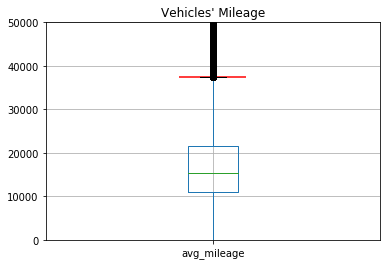

In [23]:
# calculate the quartiles for column 'avg_mileage'
Q1_avg_mileage = vehicles['avg_mileage'].quantile(0.25)
Q3_avg_mileage = vehicles['avg_mileage'].quantile(0.75)
IQR_avg_mileage = Q3_avg_mileage - Q1_avg_mileage

# specify the range of y axis
plt.ylim(-10, 50000)

# title of the chart 
plt.title("Vehicles' Mileage")

# plot the boxplot
vehicles.boxplot('avg_mileage')
plt.hlines(y=Q3_avg_mileage+1.5*IQR_avg_mileage, xmin=0.9, xmax=1.1, color='red')
plt.show()

##### Conclusion

With the red line placed at about 38000, we will consider all other vehicles with average of more than 38000 as outliers.

[<a href="#Table-of-Contents">Back to top</a>]

#### Filter and remove outliers

In [24]:
# create a new dataframe witouth the outliers
filtered_vehicles = vehicles.query('price <= 35000 and age_posted <= 25 and avg_mileage <= 38000')

# display the size of the dataset
display(filtered_vehicles.info())

# display the first five rows of the dataset
display(filtered_vehicles.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46511 entries, 0 to 51524
Data columns (total 18 columns):
price           46511 non-null int64
model_year      46511 non-null int64
model           46511 non-null object
condition       46511 non-null int64
cylinders       46511 non-null float64
fuel            46511 non-null object
odometer        46511 non-null float64
transmission    46511 non-null object
type            46511 non-null object
paint_color     46511 non-null object
is_4wd          46511 non-null bool
date_posted     46511 non-null datetime64[ns]
days_listed     46511 non-null int64
week_day        46511 non-null int64
month_posted    46511 non-null int64
year_posted     46511 non-null int64
age_posted      46511 non-null int64
avg_mileage     46511 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(9), object(5)
memory usage: 6.4+ MB


None

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted,age_posted,avg_mileage
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,custom,True,2018-06-23,19,5,6,2018,7,20714
1,25500,2013,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5,17741
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333
3,1500,2003,ford f-150,1,8.0,gas,160954.0,automatic,pickup,custom,False,2019-03-22,9,4,3,2019,16,10059
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488


##### Conclusion

We decided to filter out the outliers from the dataframe and store it in a new dataframe. Now we have 46511 rows in our new dataset with 18 columns.

[<a href="#Table-of-Contents">Back to top</a>]

#### Compare histograms

We decided to plot histograms for the parameters from the filtered dataset (without outliers) and compare them with the histograms previously plotted from the initial dataset (with outliers).

##### PRICE

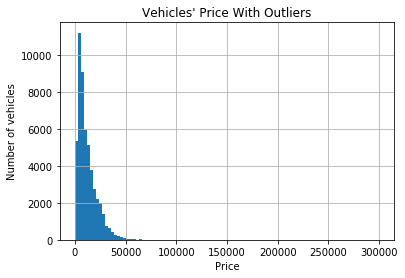

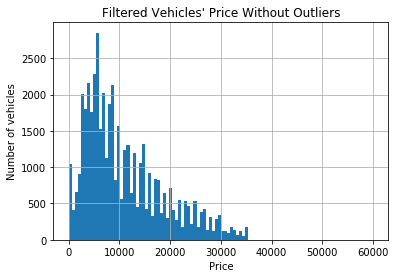

In [25]:
# Plot histogram of 'price' in old dataset
vehicles.hist('price', bins=100, range=(0, 300000))
plt.title("Vehicles' Price With Outliers")
plt.xlabel('Price')
plt.ylabel('Number of vehicles')

# Plot histogram of 'price' in the filtered dataset
filtered_vehicles.hist('price', bins=100, range=(0,60000))
plt.title("Filtered Vehicles' Price Without Outliers")
plt.xlabel('Price')
plt.ylabel('Number of vehicles')

# Display plot
plt.show()

##### Conclusion

From the new histogram, we are now able see how the data was distributed. Most of the vehicles posted for advertisement are quite cheap with price range from 0 to 10000. There are over 1000 vehicles with a price of 0, which is kind of weird, is it not? Why will you post a vehicle that cost nothing for advertisement? Maybe this set of vehicles are up for recycling?

As the price increases, the number of vehicles are decreasing.

[<a href="#Table-of-Contents">Back to top</a>]

##### AGE_POSTED

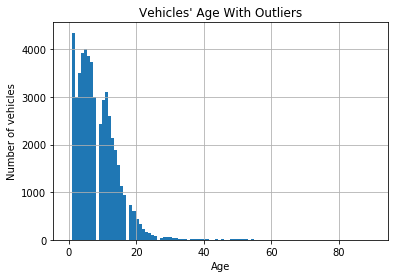

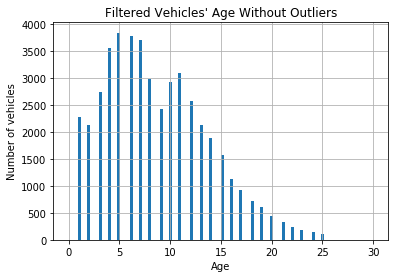

In [26]:
# Plot histogram of 'age_posted' in old dataset
vehicles.hist('age_posted', bins=100, range=(0, 90))
plt.title("Vehicles' Age With Outliers")
plt.xlabel('Age')
plt.ylabel('Number of vehicles')

# Plot histogram of 'age_posted' in the filtered dataset
filtered_vehicles.hist('age_posted', bins=100, range=(0,30))
plt.title("Filtered Vehicles' Age Without Outliers")
plt.xlabel('Age')
plt.ylabel('Number of vehicles')

# Display plot
plt.show()

##### Conclusion

Vehicles of age 5 are with the highest frequency. There are some series of increase and decrease (ups and downs) in the chart.

[<a href="#Table-of-Contents">Back to top</a>]

##### AVG_MILEAGE

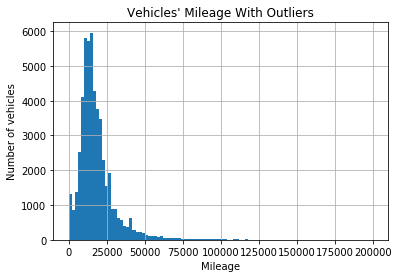

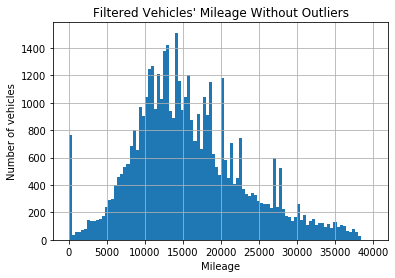

In [27]:
# Plot histogram of 'age_posted' in old dataset
vehicles.hist('avg_mileage', bins=100, range=(0, 200000))
plt.title("Vehicles' Mileage With Outliers")
plt.xlabel('Mileage')
plt.ylabel('Number of vehicles')


# Plot histogram of 'age_posted' in the filtered dataset
filtered_vehicles.hist('avg_mileage', bins=100, range=(0,40000))
plt.title("Filtered Vehicles' Mileage Without Outliers")
plt.xlabel('Mileage')
plt.ylabel('Number of vehicles')

# Display plot
plt.show()

##### Conclusion

We can conclude from the new histogram that there are over 700 vehicles with 0 mileage, meaning that these vehicles are new. There are more vehicles with mileage between 10000 and 15000.  

[<a href="#Table-of-Contents">Back to top</a>]

##### CYLINDERS

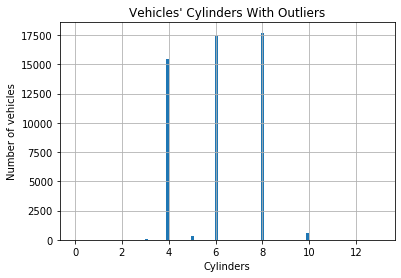

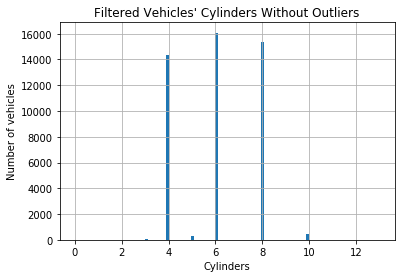

In [28]:
# Plot histogram of 'age_posted' in old dataset
vehicles.hist('cylinders', bins=100, range=(0, 13))
plt.title("Vehicles' Cylinders With Outliers")
plt.xlabel('Cylinders')
plt.ylabel('Number of vehicles')

# Plot histogram of 'age_posted' in the filtered dataset
filtered_vehicles.hist('cylinders', bins=100, range=(0,13))
plt.title("Filtered Vehicles' Cylinders Without Outliers")
plt.xlabel('Cylinders')
plt.ylabel('Number of vehicles')

# Display plot
plt.show()

##### Conclusion

In the old histogram (dataset with outliers), vehicles with 8 cylinders have the highest frequency but vehicles with 6 cylinders have the highest frequency in the new histogram (dataset without outliers).

[<a href="#Table-of-Contents">Back to top</a>]

##### CONDITION

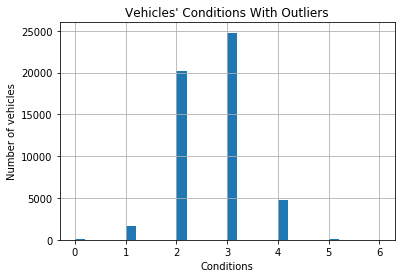

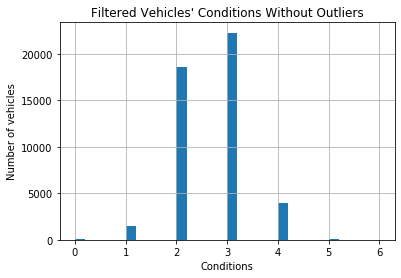

In [29]:
# Plot histogram of 'condition' in old dataset
vehicles.hist('condition', bins=30, range=(0, 6))
plt.title("Vehicles' Conditions With Outliers")
plt.xlabel('Conditions')
plt.ylabel('Number of vehicles')

# Plot histogram of 'condition' in the filtered dataset
filtered_vehicles.hist('condition', bins=30, range=(0, 6))
plt.title("Filtered Vehicles' Conditions Without Outliers")
plt.xlabel('Conditions')
plt.ylabel('Number of vehicles')

# Display plot
plt.show()

##### Conclusion

The two histograms look the same, just that there is a reduction in the number of vehicles on the horizontal axis.

[<a href="#Table-of-Contents">Back to top</a>]

#### Study how many days advertisements were displayed ('days_listed').

count    46511.000000
mean        39.538303
std         28.216851
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

'The average days vehicles were placed on advertisement is: 40'

'The median value for the number of days vehicles were placed on advertisement is: 33'

0.0009890133516802476

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Number of vehicles')

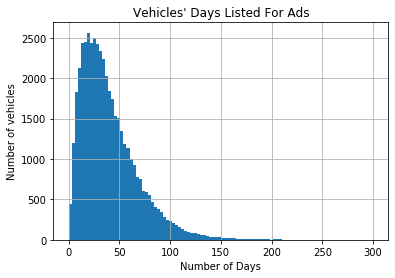

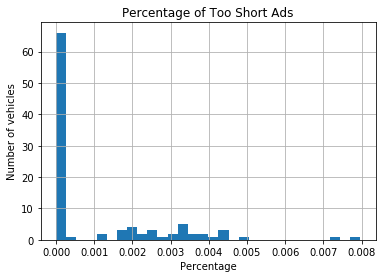

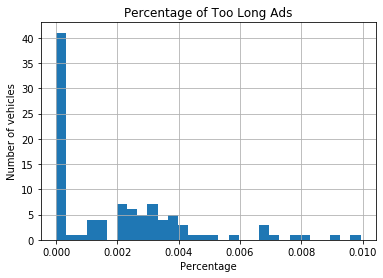

In [30]:
# get the statistics of the column 'days_listed'
display(filtered_vehicles['days_listed'].describe())

# plot histogram of 'condition' in the filtered dataset
filtered_vehicles.hist('days_listed', bins=100, range=(0, 300))
plt.title("Vehicles' Days Listed For Ads")
plt.xlabel('Number of Days')
plt.ylabel('Number of vehicles')

# calculate the mean
mean = filtered_vehicles['days_listed'].mean()
display('The average days vehicles were placed on advertisement is: {:.0f}'.format(mean))

# calculate the median
median = filtered_vehicles['days_listed'].median()
display('The median value for the number of days vehicles were placed on advertisement is: {:.0f}'.format(median))

# divide the number of days listed under 1 day by the total number of vehicles
display(len(filtered_vehicles.query('days_listed < 1')) / len(filtered_vehicles))

# create a column to save advertisements under 1 days
filtered_vehicles['too_short_ads'] = filtered_vehicles['days_listed'] < 1

# creat a pivot table and plot a histogram of it with 30 bins
filtered_vehicles.pivot_table(index='model', values='too_short_ads').hist(bins=30)
plt.title("Percentage of Too Short Ads")
plt.xlabel('Percentage')
plt.ylabel('Number of vehicles')

# create a column to save advertisements over 170 days
filtered_vehicles['too_long_ads'] = filtered_vehicles['days_listed'] > 170

# creat a pivot table and plot a histogram of it with 30 bins
filtered_vehicles.pivot_table(index='model', values='too_long_ads').hist(bins=30)
plt.title("Percentage of Too Long Ads")
plt.xlabel('Percentage')
plt.ylabel('Number of vehicles')

##### Conclusion

We used the [.describe()]() method to get the statistics of the ['days_listed']() column. The mean is higher than the median. This implies that the column has outliers in the longer days.

The zero day ads look strange in our dataset. We calculated the share of advertisements under 1 day by dividing the number of advertisements under 1 day by the total number of vehicles. We found out that advertisements under 1 day account for less than 1% of the dataset. So we decided to set a minimum day limit of 1 day for vehicles to be listed on advertisement and create a ['too_short_ads']() column using the following values:
* True if the days listed for advertisement is less than 1 day.
* False if the days listed for advertisement is equal or more than 1 day.

Ads that last 150 days are rare, almost no vehicle was placed on advertisement for more than 200 days, and around 210 days, the histogram zeroes out. We decided to set a maximum day limit of 170 days for vehicles to be listed on advertisement and create a [‘too_long_ads’]() column using the following values:
* True if the days listed for advertisement is more than 170 days.
* False if the days listed for advertisement is equal to or less than 170 days.

We then built a histogram showing the percentage of too_long_ads visits for different vehicle models (grouping by model), using 30 bins.
Most long advertisements account for less than 1% of the dataset.

Since there are outliers in the column, it is safe to say that the typical lifetime of an ad is 33 days, which is the median of the column.

Using the [Vehicles' Days Listed For Ads]() histogram, we concluded that ads that last for just a day (1 day) or less on our site are considered to be removed quickly, while ads that last for more than 170 days are considered to be abnormally long. 

[<a href="#Table-of-Contents">Back to top</a>]

#### Analyze the number of ads and the average price for each type of vehicle.

,price
type,
SUV,10198.962152
bus,17445.913043
convertible,12663.036517
coupe,13149.364275
hatchback,6613.654602
mini-van,7656.572102
offroad,14213.829670
other,9922.846847
pickup,14579.326112


'The two types of vehicle with the greatest number of ads are: SUV and sedan'

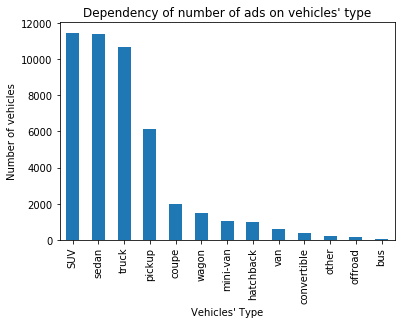

In [31]:
# create a pivot table for the avarage price per vehicle types
avg_price_type = filtered_vehicles.pivot_table(index='type', values='price', aggfunc='mean')
display(avg_price_type)

# plot a graph for number of ads against vehicles' type 
filtered_vehicles['type'].value_counts().plot(kind='bar', title="Dependency of number of ads on vehicles' type")
plt.xlabel("Vehicles' Type")
plt.ylabel('Number of vehicles')


# get the two vehicles with greatest number of ads
ads_type = filtered_vehicles['type'].value_counts().sort_values(ascending=False)
first_max = ads_type.idxmax()
ads_type = ads_type.drop(first_max)
second_max = ads_type.idxmax()

display('The two types of vehicle with the greatest number of ads are: ' + first_max + ' and ' + second_max)

##### Conclusion


The average price for bus is 17445.913043, which is highest (most expensive) compared to other vehicle types. The hatchback seems to be the cheapest.

We discovered that the two most poular type of vehicle placed on advertisement are SUV and sedan. And the least popular is the bus, which are barely place on advertisment.

[<a href="#Table-of-Contents">Back to top</a>]

#### What factors impact the price most?

For the quantitative variables, we will create scatterplots to determine whether the price of vehicles depend on age and mileage of vehicles, and also calculate the correlation coefficients to confirm our conclusion.

And for the categorical variables, we will create box-and-whisker chart to determine whether the price of vehicles depend on condition, transmission typeand color of vehicles.

##### SUV

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted,age_posted,avg_mileage,too_short_ads,too_long_ads
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,custom,True,2018-06-23,19,5,6,2018,7,20714,False,False
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,18245,False,False
8,11500,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,custom,True,2018-07-16,19,0,7,2018,6,17362,False,False
9,9200,2008,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,13381,False,False
14,12990,2009,gmc yukon,3,8.0,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,3,1,2019,10,13228,False,False


-0.573720386136816

0.25406117401860384

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

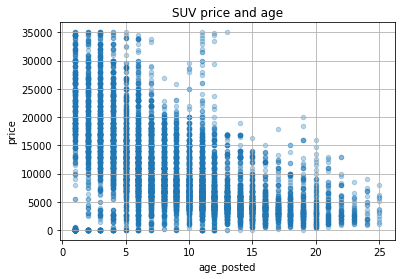

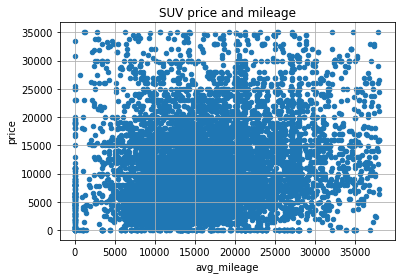

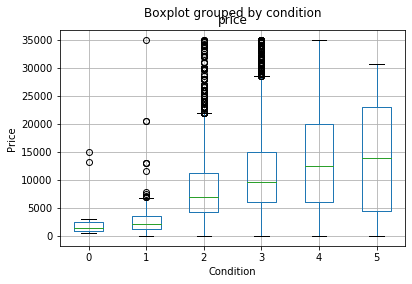

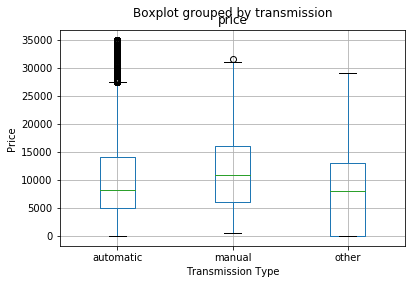

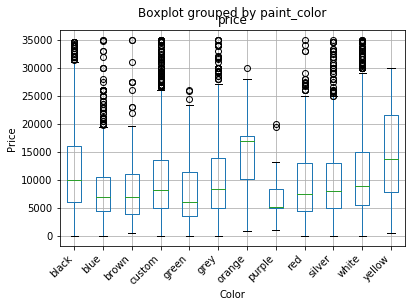

In [32]:
# filter the SUV vehicles
suv_type = filtered_vehicles.query('type == "SUV"')
display(suv_type.head())

# >>>QUANTITATIVE VARIABLES<<<

# create scatterplot for 'price' and 'age_posted' column
suv_type.plot(x='age_posted', y='price', kind='scatter', alpha=0.3, grid=True, title='SUV price and age')

# find the correlation between price and age of vehicles
display(suv_type['price'].corr(suv_type['age_posted']))

# create a sctterplot for 'price' and 'avg_mileage' column
suv_type.plot(x='avg_mileage', y='price', kind='scatter', grid=True, title='SUV price and mileage')

# find the correlation between price and mileage of vehicles
display(suv_type['price'].corr(suv_type['avg_mileage']))


# >>>CATEGORICAL VARIABLES<<<

# create a box-and-whisker chart for 'price' and 'condition' column
suv_type.boxplot(column=['price'], by='condition', return_type='axes')
plt.xlabel("Condition")
plt.ylabel('Price')

# create a box-and-whisker chart for 'price' and 'transmission' column 
suv_type.boxplot(column=['price'], by='transmission', return_type='axes')
plt.xlabel("Transmission Type")
plt.ylabel('Price')

# create a box-and-whisker chart for 'price' and 'paint_color' column
suv_type.boxplot(column=['price'], by='paint_color', return_type='axes')
plt.xlabel("Color")
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

##### Conclusion

We create a dataframe [suv_type]() to filter out the SUV vehicles from the filtered dataset. 

For the quantitative variables, the following conclusions were drawn;
* Price and age: from the scatterplots, we can see that there is a decrease in the price as the age of the vehicles increases. This means that the age of SUV vehicles has impact on the price. And with a correlation coefficient of -0.573720386136816, which is closer to -1, this means that there is a strong dependency.
* Price and mileage: from the scatterplots, there is an even distribution. This means that the average mileage of SUV vehicles do not have any impact on the price. With a correlation coefficient of 0.25406117401860384, which is closer to 0, this means that there is a weak connection.

For the categorical variables, the following conclusions were drawn;
* Price and condition: we can see that there is an increase in price as the condition increases. Condition of 0 means the vehicle is salvage, while condition of 5 means the vehicle is new. We can therefore, conclude that the condition of SUV vehicles have an impact on the price.
* Price and transmission type: from the box-and-whisker chart, there are slight difference between the prices, so we deduced that the transmission type of SUV vehicles do not have impact on the price.
* Price and color: there are flunctuations in the boxes and whiskers, so we conclude that the color of SUV vehicles do not have any impact on the price.

[<a href="#Table-of-Contents">Back to top</a>]

##### SEDAN

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day,month_posted,year_posted,age_posted,avg_mileage,too_short_ads,too_long_ads
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333,False,False
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488,False,False
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,26404,False,False
11,8990,2012,honda accord,3,4.0,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,3,3,2019,7,15877,False,False
13,16500,2018,hyundai sonata,3,4.0,gas,22104.0,automatic,sedan,silver,False,2019-01-14,29,0,1,2019,1,22104,False,False


-0.6045907416228892

0.18990798764179564

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

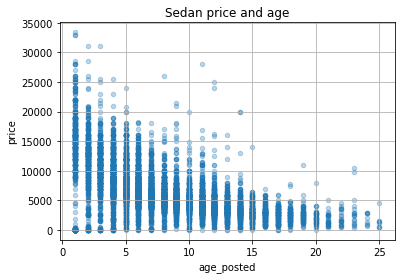

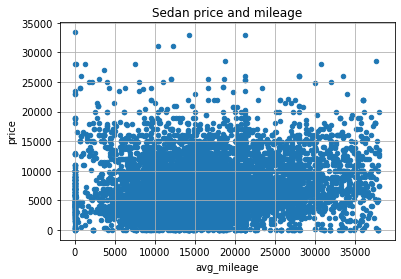

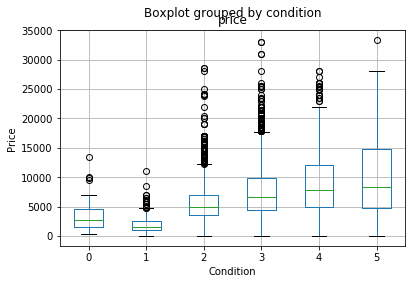

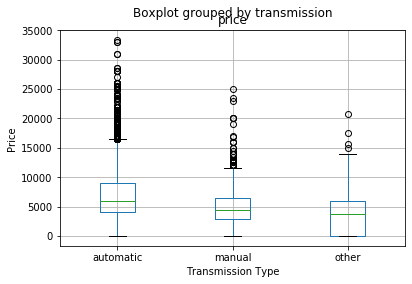

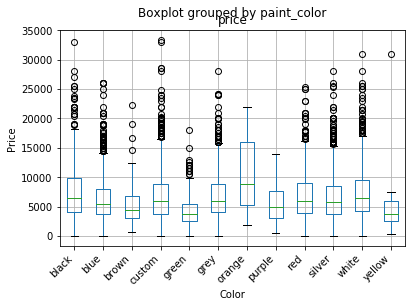

In [33]:
# filter the sedan vehicles
sedan_type = filtered_vehicles.query('type == "sedan"')
display(sedan_type.head())

# >>>QUANTITATIVE VARIABLES<<<

# create scatterplot for 'price' and 'age_posted' column
sedan_type.plot(x='age_posted', y='price', kind='scatter', alpha=0.3, grid=True, title='Sedan price and age')

# find the correlation between price and age of vehicles
display(sedan_type['price'].corr(sedan_type['age_posted']))

# create scatterplot for 'price' and 'avg_mileage' column
sedan_type.plot(x='avg_mileage', y='price', kind='scatter', grid=True, title='Sedan price and mileage')

# find the correlation between price and mileage of vehicles
display(sedan_type['price'].corr(sedan_type['avg_mileage']))


# CATEGORICAL VARIABLE

# create a box-and-whisker chart for 'price' and 'condition' column
sedan_type.boxplot(column=['price'], by='condition', return_type='axes')
plt.xlabel("Condition")
plt.ylabel('Price')

# create a box-and-whisker chart for 'price' and 'transmission' column
sedan_type.boxplot(column=['price'], by='transmission', return_type='axes')
plt.xlabel("Transmission Type")
plt.ylabel('Price')

# create a box-and-whisker chart for 'price' and 'paint_color' column
sedan_type.boxplot(column=['price'], by='paint_color', return_type='axes')
plt.xlabel("Color")
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')

##### Conclusion

We create a dataframe [sedan_type]() to filter out the sedan vehicles from the filtered dataset. 

For the quantitative variables, the following conclusions were drawn;
* Price and age: from the scatterplots, we can see that there is a decrease in the price as the age of the vehicles increases. This means that the age of sedan vehicles has impact on the price. And with a correlation coefficient of -0.6045907416228892, which is closer to -1, this means that there is a strong dependency.
* Price and mileage: from the scatterplots, there is an even distribution. This means that the average mileage of sedan vehicles do not have any impact on the price. With a correlation coefficient of 0.18990798764179564, which is closer to 0, this means that there is a weak connection.

For the categorical variables, the following conclusions were drawn;
* Price and condition: we can see that there is an increase in price as the condition increases. Condition of 0 means the vehicle is salvage, while condition of 5 means the vehicle is new. We can therefore, conclude that the condition of sedan vehicles have an impact on the price.
* Price and transmission type: from the box-and-whisker chart, there are slight difference between the prices, so we deduced that the transmission type of sedan vehicles do not have impact on the price.
* Price and color: there are flunctuations in the boxes and whiskers, so we conclude that the color of sedan vehicles do not have any impact on the price.

[<a href="#Table-of-Contents">Back to top</a>]

### Step 5. Overall conclusion

We have successfully analyzed free advertisements for 51525 vehicles that are published on our site and the following conclusions were drawn.

During the data preparation,we discovered that...

* 5 columns out of 13 columns are with missing values.
* half of the values in ['is_4wd']() column are missing.
* two automatic vehicles () have a model year of 1908, which does not seem right, so we decided to delete them from our dataset.
* we changed the data type of 3 columns (['model_year'](), ['is_4wd'](), and ['date_posted']()) to the desired format.

We carried out calculations to...
1. extract the days of week, month and year vehicles were placed for ad, 
2. get the age of each vehicle,
3. vehicles' average mileage per year,  

stored the results in different columns and added them to our dataset.


While studying some parameters (price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition) by plotting histogram for each parameter, we dicovered that there are abnomalies in our dataset which made it difficult for us to carry out explanatory analysis. Due to this, we determined the upper limits of the outliers and filtered them out by creating a new dataframe. 

The new or filtered dataframe is reduced to 46511 rows (that is, 46511 vehicles). We continued our analysis using the filtered dataframe since we've gotten rid of the outliers. We were now able to see how the data was distributed. 
* Most of the vehicles posted for advertisement are quite cheap with price range from 0 to 10000. There are over 1000 vehicles with a price of 0, which is kind of weird.
* Vehicles of age 5 are with the highest frequency.
* There are over 700 vehicles with 0 mileage, meaning that these vehicles are new, and there are more vehicles with mileage between 10000 and 15000.
* Vehicles with 6 cylinders have the highest frequency.
* Most of the vehicles are in excellent and good condition with more than half of the whole vehicles falling in this category. We barely have new vehicles in our dataframe.

The typical lifetime of an ad placed on our site is 33 days.

Ads that lasted for just a day or less on our website are considered to have been removed quickly, and we discovered that less than 1% of them are in our filtered dataset. Also, ads that last for more than 170 days are considered to have abnormally spent long time on our site, and we discovered that less than 1% are in the filtered dataset.

We also discovered that there some vehicles cost nothing, and most of the vehicles types posted on ads are SUV and sedan.

We figured that, for the SUV type of vehicles, price depend on age and the condition of the vehicle. And also, for the sedan type of vehicle, price depend on age and the condition of the vehicle.

We can therefore, conclude that the age and condition of vehicles have an impact in the price of the vehicle. 

[<a href="#Table-of-Contents">Back to top</a>]

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn